In [1]:
# run `include("./developer/revice.jl")`
using Pkg
Pkg.instantiate()
# Pkg.add("Revise")
using Revise
Pkg.activate("../")
using Antique
using Plots

  Activating project at `C:\Users\user\Desktop\jafar-san\Antique.jl`


### Delta function potential

In [2]:
DP = DeltaPotential(α=0.1,m=0.5, ℏ=0.1)

DeltaPotential(0.1, 0.5, 0.1)

In [3]:
E(DP)

-0.25

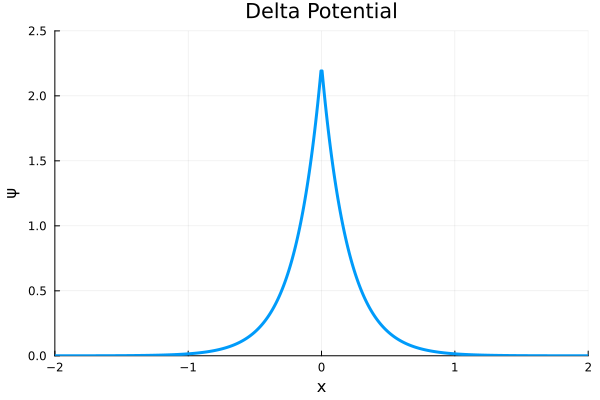

In [4]:
x = LinRange(-2,2,500);
ψδ = ψ(DP,x);

plot(x,ψδ,linewidth=3)
plot!(xlim=[-2,2],ylim=[0,2.5],legend=false)
plot!(xlabel="x",ylabel="ψ",title="Delta Potential")

In [5]:
using QuadGK
using Printf

In [6]:
analytical = 1
numerical  = quadgk(x -> conj(ψ(DP, x)) * ψ(DP, x), -Inf, Inf, maxevals=10^3)[1]
acceptance = iszero(analytical) ? isapprox(analytical, numerical, atol=1e-5) : isapprox(analytical, numerical, rtol=1e-5)

true

In [7]:
@printf("%17.12f | %17.12f %s\n", analytical, numerical, acceptance ? "✔" : "✗")

   1.000000000000 |    1.000000000000 ✔


In [8]:
? V(::DeltaPotential)

`V(model::DeltaPotential; x)`

$$
  V(x) = -\alpha \delta(x).
$$


In [9]:
? E(::DeltaPotential)

`E(model::DeltaPotential)`

$$
  E = - \frac{m\alpha^2}{2\hbar^2}
$$


In [10]:
? ψ(::DeltaPotential)

`ψ(model::DeltaPotential, x)`

$$
   \psi(x) = \frac{\sqrt{m\alpha}}{\hbar} \mathrm{e}^{-m\alpha |x|/\hbar^2}
$$


In [11]:
? DeltaPotential

search: DeltaPotential



`DeltaPotential(α=1.0, m=1.0, ℏ=1.0)`

$\alpha$ is the potential strength, $m$ is the mass of particle and $\hbar$ is the reduced Planck constant (Dirac's constant).
